In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

from scipy.optimize import least_squares

In [2]:
def shrink(data, rows, cols):
    return data.reshape(rows, int(np.floor(data.shape[0]/rows)), cols, int(np.floor(data.shape[1]/cols))).sum(axis=1).sum(axis=2)

filename Base: Jag_rectangle_4x20_700N_0p9E
total timesteps: 8000001


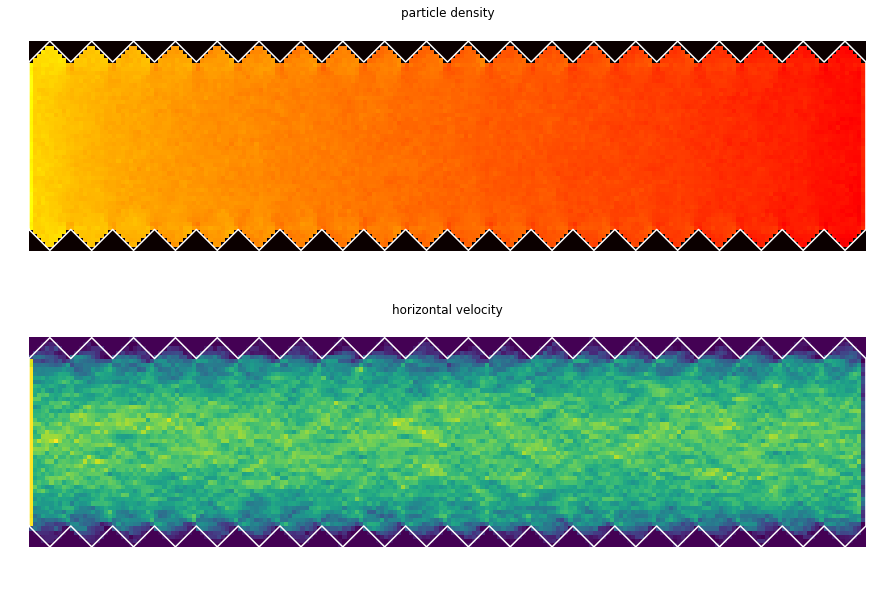

In [7]:
from scipy.ndimage import gaussian_filter

fnameBases = ['Jag_rectangle_4x20_700N_0p9E'
             ] #list of base name of simulations

Nsims = 2 #number of simulations
blur = 0 #performs a gaussian blur

symm = False #symmetrizes the output

N_bins = 7

angleDeps = np.zeros(((7,60)))
for fnameNum,fnameBase in enumerate(fnameBases):
    print('filename Base: '+fnameBase)
    
    fig = plt.figure(figsize = (15,10))
    ax0 = fig.add_subplot(211)
    ax1 = fig.add_subplot(212)
    #ax2 = fig.add_subplot(223)
    #ax3 = fig.add_subplot(224)

    #calculate the angle dependence and sum up the densities
    for i in range(Nsims):
        for appendName in ['']:
            fname = fnameBase+appendName
            with np.load('./'+fname+'/'+fname+'_%03d.npz'%i) as mat:

                if (i == 0) and ('' in appendName):
                    rho = mat['Erho'].copy().T
                    vX = mat['Px'].copy().T
                    vY = mat['Py'].copy().T

                    print('total timesteps: %d'%mat['timeCount'])
                     #load in the 2D histogram axes from simulation            
                    histX = mat['histX'].T
                    histY = mat['histY'].T
                    borderX = mat['borderX']
                    borderY = mat['borderY']
                else:
                    rho += mat['Erho'].T
                    vX  += mat['Px'].T
                    vY  += mat['Py'].T

    
    #ax0 plots the particle density
    rhoPlot = gaussian_filter(rho,blur)
    m1 = np.median(rho)
    if symm:
        rhoPlot+=rhoPlot[:,::-1]
        rhoPlot/=2.
    ax0.pcolormesh(histX,histY,rhoPlot,cmap = 'hot',vmin = 0.8*m1,vmax = 1.2*m1)
    ax0.axis('off')
    ax0.plot(borderX,borderY,'w')
    ax0.axis('equal')
    
    #ax1 plots the horizontal velocity distribution
    vXplot = gaussian_filter(vX,blur)
    m1 = np.max(np.abs(vXplot[2:-2,2:-2]))
    if symm:
        vXplot-=vXplot[:,::-1]
        vXplot/=2.
    ax1.pcolormesh(histX,histY,vXplot, vmin=0, vmax=m1)
    ax1.axis('off')
    ax1.plot(borderX,borderY,'w')
    ax1.axis('equal')
    
    #ax2 plots the vertical velocity distribution
    #vYplot = gaussian_filter(vY,blur)
    #m1 = np.max(np.abs(vXplot))*1.5
    #if symm:
    #    vYplot+=vYplot[:,::-1]
    #    vYplot/=2.
    #ax2.pcolormesh(histX,histY,vYplot,cmap='RdBu_r', vmin=-m1, vmax=m1)
    #ax2.axis('off')
    #ax2.plot(borderX,borderY,'k')
    #ax2.axis('equal')
    
        
    ax0.set_title('particle density')
    ax1.set_title('horizontal velocity')
    #ax2.set_title('vertical velocity')
    
    #plt.savefig(fname+'.jpg',dpi = 150)
    plt.show()

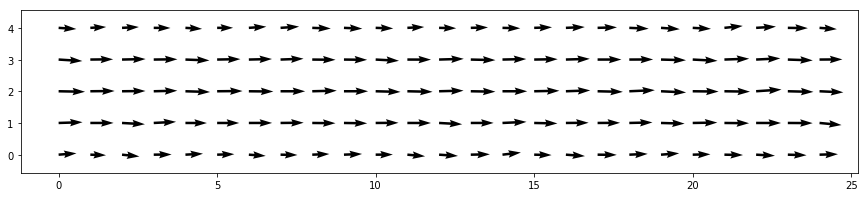

In [8]:
fig = plt.figure(figsize = (15,3))
rho2 = rho.copy()
rho2[rho==0] = np.inf
plt.quiver(shrink((vX/rho2)[5:-5,:],5,25),shrink((vY/rho2)[5:-5,:],5,25),width = .003, scale=50)
plt.axis('equal')
plt.show()

In [9]:
x = np.linspace(-2.5,2.5,50)
x2 = np.linspace(-3.1,3.1,100)
y = 80 - 40*x2**2

def quad_fun(fits,x,y):
    return fits[0]+fits[1]*x**2-y

fits0 = np.array([0,-.01])

rho2 = rho.copy()
rho2[rho==0] = np.inf

res_lsq = least_squares(quad_fun, fits0, args=(x[5:-5],np.mean((vX/rho2)[:,50:-50],axis=1)[5:-5]))

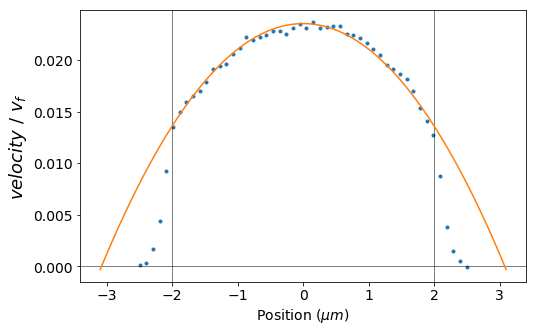

In [10]:
fig = plt.figure(figsize=(8,5))

plt.rcParams.update({'font.size': 14})

plt.plot(x,np.mean((vX/rho2)[:,50:-50],axis=1),'.')
plt.axvline(-2,color='k',linewidth=.5)
plt.axvline(2,color='k',linewidth=.5)
plt.axhline(0,color='k', linewidth=.5)
#plt.plot(x,np.mean(Py[:,:]/Erho[:,:],axis=1),'.')
plt.plot(x2,quad_fun(res_lsq.x,x2,0*x2))
#plt.plot(x,quad_fun(fits0,x,0*x))
plt.xlabel('Position ($\mu m$)', fontsize=14)
plt.ylabel('$velocity\ /\ v_f$', fontsize=18)
plt.show()